In [1]:
!pip install contextily

In [2]:
!pip install descartes

In [69]:
ls

 Volume in drive C is Windows
 Volume Serial Number is C624-170B

 Directory of C:\Users\tuf69055\geoviz

09/13/2021  07:01 PM    <DIR>          .
09/13/2021  07:01 PM    <DIR>          ..
09/13/2021  06:45 PM    <DIR>          .ipynb_checkpoints
05/27/2020  04:10 PM                 5 census-tract-data.cpg
05/27/2020  04:10 PM         1,275,138 census-tract-data.dbf
05/27/2020  04:10 PM               165 census-tract-data.prj
05/27/2020  04:10 PM               298 census-tract-data.qpj
05/27/2020  04:10 PM           491,476 census-tract-data.shp
05/27/2020  04:10 PM             3,172 census-tract-data.shx
09/13/2021  06:12 PM           341,442 census-tract-data.zip
09/13/2021  06:12 PM            38,492 city_limit.zip
08/20/2020  10:01 AM                 5 City_Limits.cpg
08/20/2020  10:01 AM               188 City_Limits.dbf
08/20/2020  10:01 AM               143 City_Limits.prj
08/20/2020  10:01 AM            47,468 City_Limits.shp
08/20/2020  10:01 AM               108 City_Limits.s

In [28]:
import geopandas as gpd 
from matplotlib import pyplot as plt
import contextily as ctx


In [49]:
# first read in shapefiles as DFs


census_tracts = gpd.read_file('census-tract-data.shp')
census_tracts.crs



<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [50]:
crash_data_shp = 'crash_data_collision_crash_2007_2017.shp'
car_crash = gpd.read_file(crash_data_shp)
car_crash.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
city_limit_shp = 'City_Limits.shp'
philly_limit = gpd.read_file(city_limit_shp)
philly_limit.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [114]:
philly_limit_2272 = philly_limit.to_crs(epsg=2272) 
philly_limit_2272.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Pennsylvania - SPCS - S
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [115]:
car_crash_2272 = car_crash.to_crs(epsg=2272) 
car_crash_2272.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Pennsylvania - SPCS - S
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [116]:
census_tracts_2272 = census_tracts.to_crs(epsg=2272) 
census_tracts_2272.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Pennsylvania - SPCS - S
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

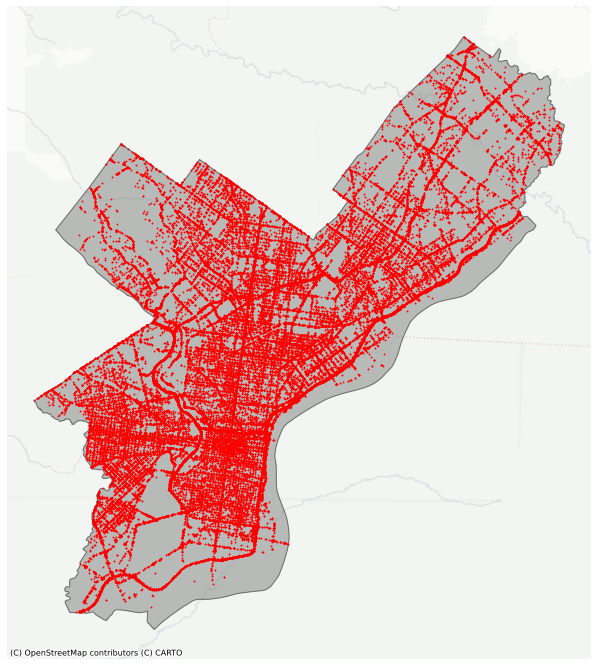

In [117]:
# prepare the plot and the axis
fig, ax = plt.subplots(1, figsize=(12, 12))

# plot the city limit
philly_limit_2272.plot(figsize=(10, 10), ax=ax, alpha=0.5, color='grey', edgecolor='k')

# add the basemap to your plot
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()


# plot the traffic accident points
car_crash_2272.plot(marker='*', ax=ax, color='red', alpha = 1, markersize=1)

In [89]:
#Select crash years
crash15 = car_crash_2272.loc[car_crash['crash_year']==2015]

crash16 = car_crash_2272.loc[car_crash['crash_year']==2016]

crash17 = car_crash_2272.loc[car_crash['crash_year']==2017]


In [90]:
# Select monday as day of the week for all crash years
crash15_monday = crash15.loc[crash15['day_of_wee']==2]

crash16_monday = crash16.loc[crash16['day_of_wee']==2]

crash17_monday = crash17.loc[crash17['day_of_wee']==2]

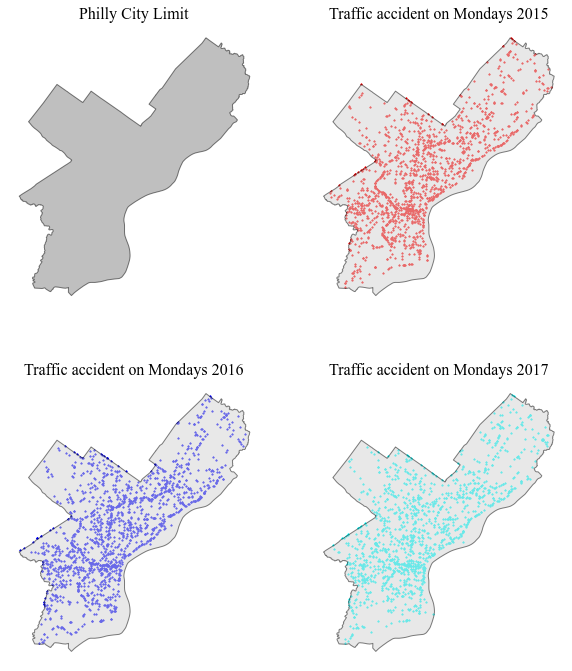

In [123]:
# Set Axis for sublots
fig, ax = plt.subplots(2, 2, figsize=(10, 12))

# PLot the city limit
philly_limit_2272.plot(ax=ax[0][0], alpha=0.5, color='grey', edgecolor='k')
ax[0][0].set_title('Philly City Limit', fontsize='16', fontname='Times New Roman')
ax[0][0].set_axis_off()

# accident of 2015 Mondays
crash15_monday.plot(marker='*', ax=ax[0][1], color='red', markersize=2)
ax[0][1].set_title('Traffic accident on Mondays 2015', fontsize='16', fontname='Times New Roman')
philly_limit_2272.plot(ax=ax[0][1], alpha=0.5, color='lightgrey', edgecolor='k')
ax[0][1].set_axis_off()

# accident of 2016 Mondays
crash16_monday.plot(marker='*', ax=ax[1][0], color='blue', markersize=2)
ax[1][0].set_title('Traffic accident on Mondays 2016', fontsize='16', fontname='Times New Roman')
philly_limit_2272.plot(ax=ax[1][0], alpha=0.5, color='lightgrey', edgecolor='k')
ax[1][0].set_axis_off()

# accident of 2017 Mondays
crash17_monday.plot(marker='*', ax=ax[1][1], color='cyan', markersize=2)
ax[1][1].set_title('Traffic accident on Mondays 2017', fontsize='16', fontname='Times New Roman')
philly_limit_2272.plot(ax=ax[1][1], alpha=0.5, color='lightgrey', edgecolor='k')
ax[1][1].set_axis_off()